<h1><center>Case Study - B3</center></h1>

# Exploratory Data Analysis

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
# loading df_cleaned and resetting Dtypes
df = pd.read_csv("df_cleaned.csv")
df['id_cliente']=df['id_cliente'].astype(str)
df[['renda', 'profissao']] = df[['renda', 'profissao']].astype('category')

|Nome          |Período|Unidade|Descrição                        |
|:-------------|-----  |------|--------------------------------- |
|id_cliente    |N/A    |N/A   |Unique id that identifies customer  |
|renda         |N/A    |R\$   |Declared income range          |
|profissao     |N/A    |N/A   |Group of professions grouped     |
|qt_compras    |M0     |ativos|Number of acquired assets   |
|val_compra    |M0     |R\$    |Total value of purchased shares   |
|tm_compra     |M0     |R\$   |Value per share - purchase ("ticket")|
|qt_vendas     |M0     |ativos|Number of assets sold    |
|val_venda     |M0     |R\$    |Total value of shares sold    |
|tm_venda      |M0     |R\$    |Value per share - sale ("ticket") |
|dif_cv        |M0     |ativos |Difference between buying and selling assets     |
|acoes         |M0     |#     |# shares in the portfolio               |
|acoes_dif     |M0     |#     |# different shares in the portfolio    |
|ativo_m1      |M1     |Flag  |1=Customer is active in M1        |
|ligou_cr_m1   |M1     |Flag  |1=Contact from sales team in M1        |

First, understanding the number of customers who left and remained in M1:

In [3]:
count_ativo = len(df[df['ativo_m1']==1]) # counting active customers
count_n_ativo = len(df[df['ativo_m1']==0]) # counting non-active customers
pct_ativo = (count_ativo/(count_ativo+count_n_ativo))*100 
pct_n_ativo = (count_n_ativo/(count_ativo+count_n_ativo))*100

print(f"percentage of active customers in M1 is: {pct_ativo}%")
print(f"percentage of customers who left in M1 is: {pct_n_ativo}%")

percentage of active customers in M1 is: 88.98%
percentage of customers who left in M1 is: 11.020000000000001%


The classes are unbalanced and the *ativo/n_ativos** ratio is **89/11**.

## Distributions

Understanding the distributions of numerical features:

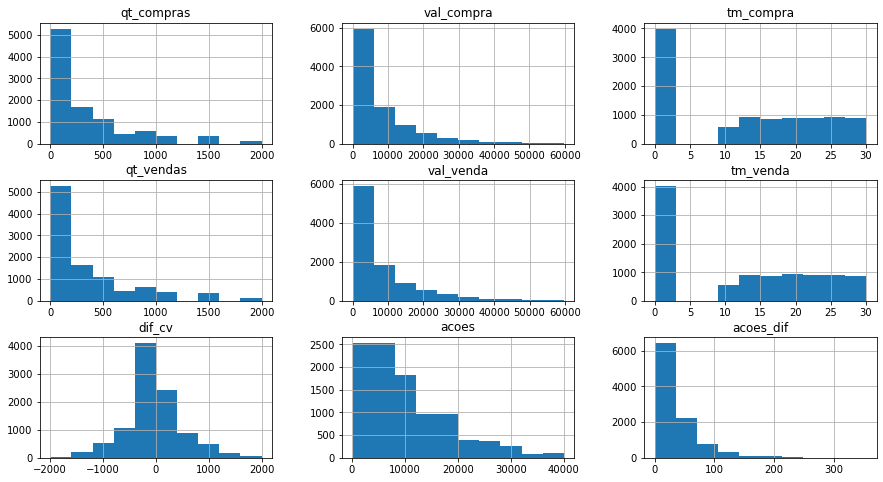

In [4]:
df[['qt_compras', 'val_compra','tm_compra','qt_vendas',
               'val_venda','tm_venda','dif_cv','acoes','acoes_dif']].hist(figsize=(15,8));

#### Comments:

- The distributions of purchases and sales are very similar, horizontally and vertically
- Quantities of assets bought and sold by customers are concentrated between 0-200
- Total values of assets bought and sold by customers are concentrated between R\$ 0-5K
- Most customers have around 0 - 10k shares, but with less than 50 different shares
- There are more customers who sold more than they bought than customers who bought more than they sold (dif_cv < 0), in terms of transactions. But it doesn't say much about absolute investment leaving.

In [5]:
# confirming proximity of purchase and sales distributions (qt, val, tm)
df[['qt_compras','qt_vendas', 'val_compra', 'val_venda', 'tm_compra', 'tm_venda']].sum()

qt_compras     3595075.92
qt_vendas      3644690.39
val_compra    72065439.53
val_venda     73302128.81
tm_compra       120215.87
tm_venda        119478.74
dtype: float64

Checking if the same customer appears more than once:

In [6]:
df['id_cliente'].duplicated().sum()

0

To analyze feature distributions according to customer status in M1 (active vs inactive), I will cluster the numerical values into ranges:

In [7]:
df_cluster = df.copy()
df_cluster['qt_compras'] = ['0-250' if x<250 else '250-500' if 250<=x<500 else '500-1000' if 500<=x<1000 else '>1000' for x in df_cluster['qt_compras']]
df_cluster['val_compra'] = ['0-5k' if x<5000 else '5k-10k' if 5000<=x<10000 else '10k-20k' if 10000<=x<20000 else '>20k' for x in df_cluster['val_compra']]
df_cluster['tm_compra'] = ['0-5' if x>5 else '5-10' if 5<=x<10 else '10-20' if 19<=x<20 else '>20' for x in df_cluster['tm_compra']]
df_cluster['qt_vendas'] = ['0-250' if x<250 else '250-500' if 250<=x<500 else '500-1000' if 500<=x<1000 else '>1000' for x in df_cluster['qt_vendas']]
df_cluster['val_venda'] = ['0-5k' if x<5000 else '5k-10k' if 5000<=x<10000 else '10k-20k' if 10000<=x<20000 else '>20k' for x in df_cluster['val_venda']]
df_cluster['tm_venda'] = ['0-5' if x>5 else '5-10' if 5<=x<10 else '10-20' if 19<=x<20 else '>20' for x in df_cluster['tm_venda']]
df_cluster['dif_cv'] = ['-2k a -1k' if x<-1000 else '-1k a 0' if -1000<=x<0 else '0 a 1k' if 0<=x<1000 else '>1k' for x in df_cluster['dif_cv']]
df_cluster['acoes'] = ['0-1k' if x<1000 else '1k-2k' if 1000<=x<2000 else '2k-3k' if 2000<=x<3000 else '>3k' for x in df_cluster['acoes']]
df_cluster['acoes_dif'] = ['0-30' if x<30 else '30-70' if 30<=x<70 else '70-100' if 70<=x<100 else '>100' for x in df_cluster['acoes_dif']]


In [8]:
# testing if it worked:
df_cluster.head(2)

,id_cliente,renda,profissao,qt_compras,val_compra,tm_compra,qt_vendas,val_venda,tm_venda,dif_cv,acoes,acoes_dif,ativo_m1,ligou_cr_m1
0,280249781,De 0 a 5k,B,0-250,0-5k,>20,0-250,0-5k,0-5,-1k a 0,>3k,30-70,True,False
1,706585147,De 5 a 10k,A,0-250,0-5k,>20,500-1000,5k-10k,0-5,-1k a 0,>3k,0-30,True,False


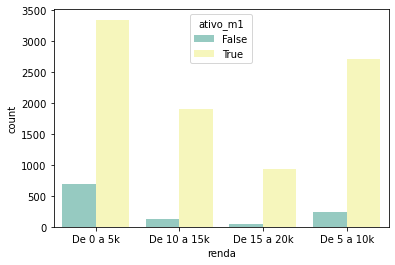

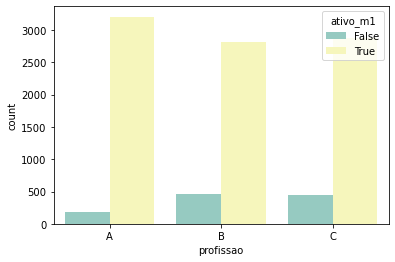

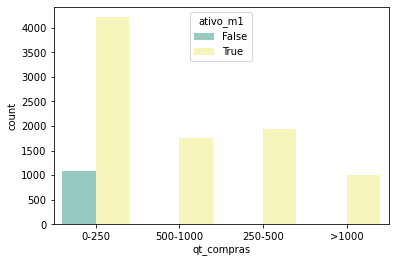

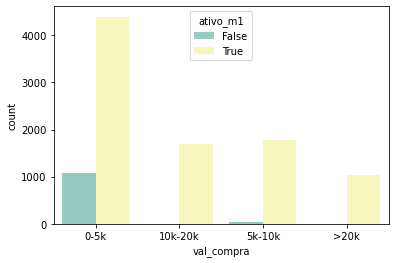

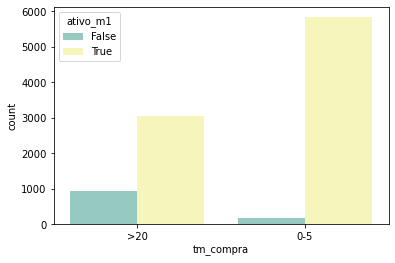

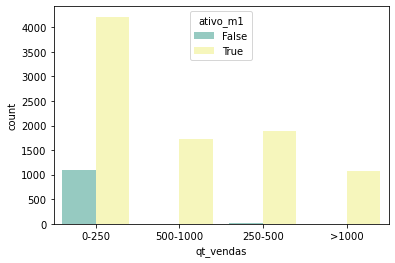

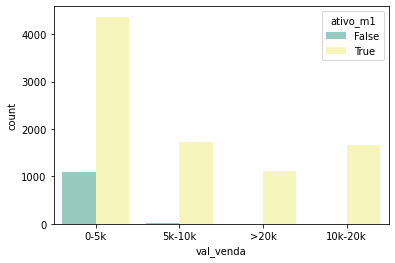

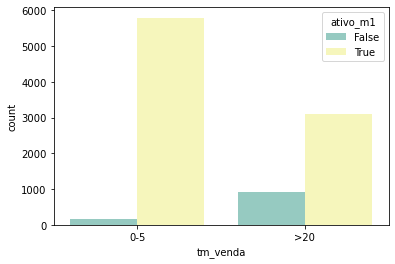

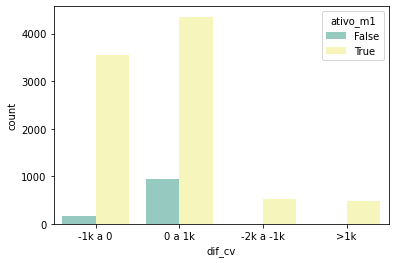

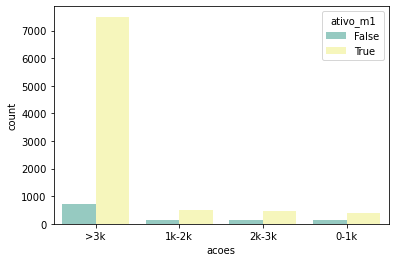

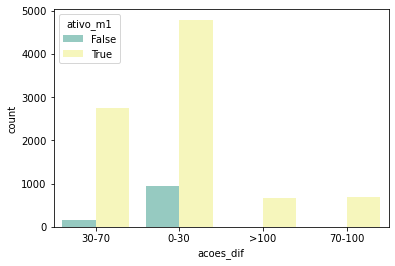

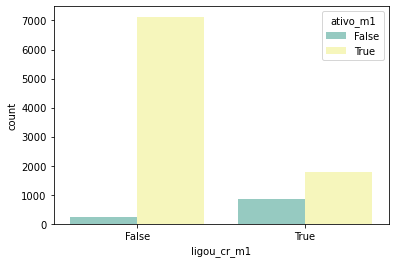

In [9]:
# creating a loop through all features (except id and independent variable 'ativo_m1' - check relations

features = ['renda', 'profissao', 'qt_compras', 'val_compra','tm_compra','qt_vendas',
               'val_venda','tm_venda','dif_cv','acoes','acoes_dif','ligou_cr_m1']

for f in features:
    sns.countplot(x = f, data = df_cluster, palette = 'Set3', hue = 'ativo_m1')
    plt.show()

#### Comments:

- The lower the income range, the greater the number of clients who left the brokerage in M1 (but also those who remained, which may be just a simple proportion of the distribution)
- More clients from professions B and C left in M1 than from professions A (different from those who remained)
- Almost all customers who left in M1 made less than 250 transactions, either buying or selling, in M0
- Almost all customers who left in M1 transacted (buy and sell) equal to or less than 5k in M0
- Only customers with a buy-sell difference between -1k to 1k left in M1 - although it follows the more concentrated distribution in the center (RF will show 10% importance / central trend will show that it is -300 to 300)
- Only customers with 70 different shares or less left in M1
- There were RC contacts with both clients who remained and left the brokerage

## Correlations

Understand if there are linear correlations between attributes:

In [10]:
# To analyze linear correlations, I changed the datatype from *ativo_m1* to numeric again
df_int = df.copy()
result = df_int['ativo_m1'].astype(int)
df_int['ativo_m1'] = result

Removing columns that have multicollinearity (val_compra, qt_compra, etc) and leaving only the **ticket médio**, the difference between buying and selling assets and stock information:

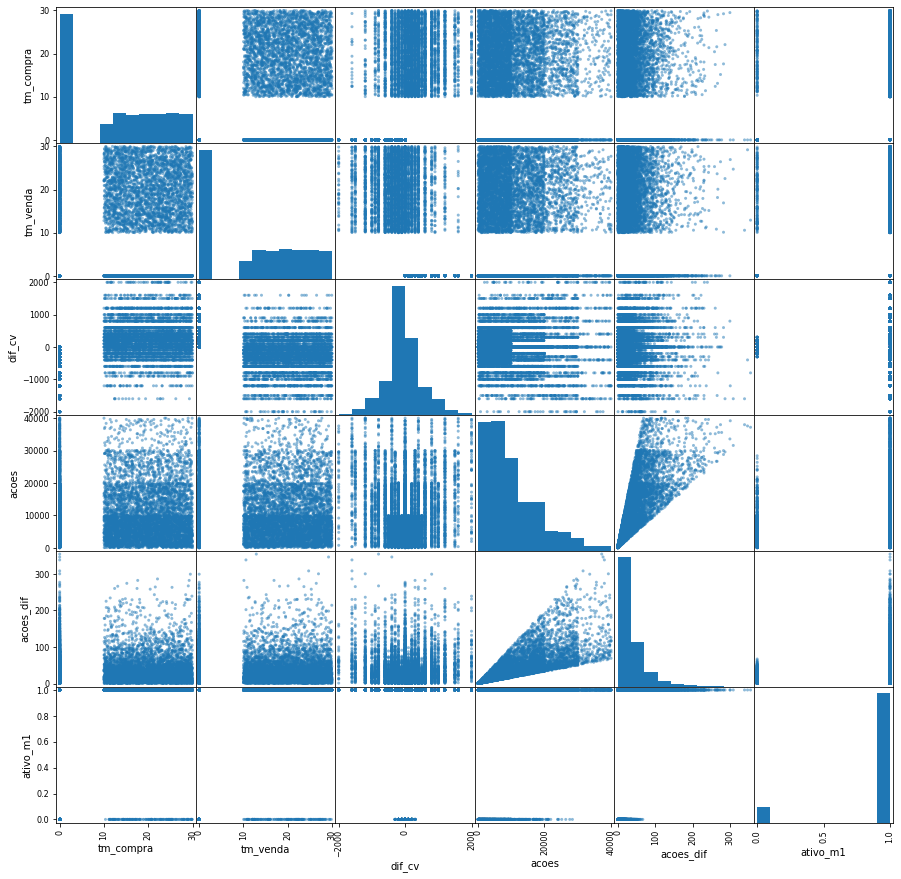

In [11]:
# returns a scatter-type matrix relating the columns with numeric data to each other
pd.plotting.scatter_matrix(df_int[['tm_compra', 'tm_venda','dif_cv', 'acoes', 'acoes_dif', 'ativo_m1']], figsize=(15,15));

#### Comments:

- There are no very visible correlations, other than those expected, such as the positive correlation between # stocks and # different stocks; and distribution relationships that we've analyzed previously.

Checking with heatmap:

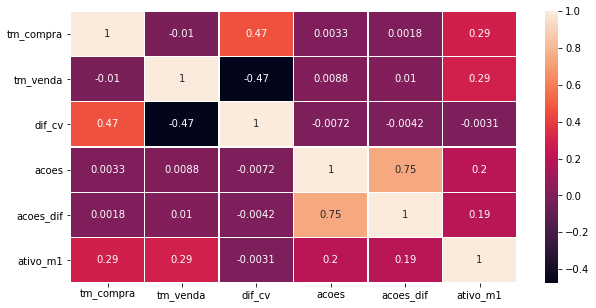

In [12]:
fig, ax = plt.subplots(figsize=(10,5))         # Sample figsize in inches

cor = df[['tm_compra', 'tm_venda','dif_cv', 'acoes', 'acoes_dif', 'ativo_m1']].corr()
sns.heatmap(cor, annot=True, fmt=".2g", linewidths=0.5);

#### Comments:

- Average ticket values are those that have the highest linear correlation with the client remaining active or inactivating their brokerage account, but since **ativo_m1** is a binary category variable, "r" is not the ideal indicator

Separating the dataframe into different groups of only clients who left (df0) and only clients who remained (df1) at the broker, to run the scatter matrix again:

In [13]:
df0 = df_int.loc[(df_int.ativo_m1 == 0)]
df1 = df_int.loc[(df_int.ativo_m1 == 1)]

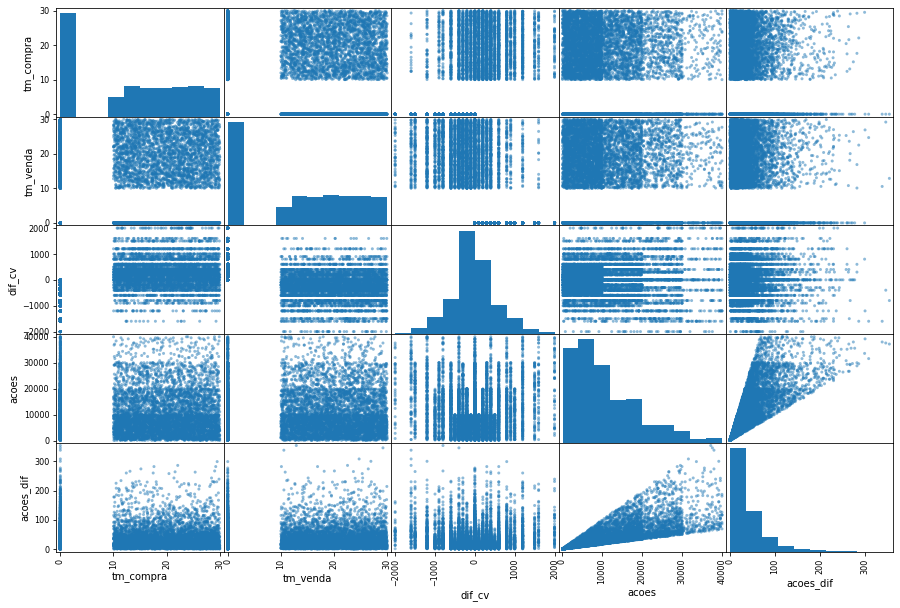

In [14]:
# again leaving only average ticket (it already includes volume and value)
pd.plotting.scatter_matrix(df1[['tm_compra', 'tm_venda','dif_cv', 'acoes', 'acoes_dif']], figsize=(15,10));

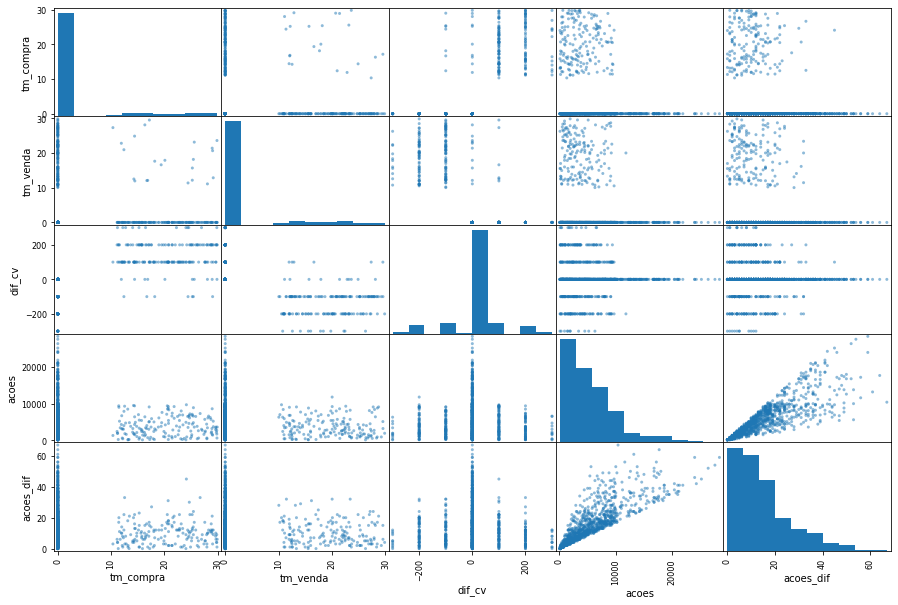

In [15]:
# again leaving only average ticket (it already includes volume and value)
pd.plotting.scatter_matrix(df0[['tm_compra', 'tm_venda','dif_cv', 'acoes', 'acoes_dif']], figsize=(15,10));

#### Comments:

- There are no very visible correlations, other than those expected, such as the positive correlation between # stocks and # different stocks; and distribution relationships that we've analyzed previously.

Evaluating central trend indicators in relation to **ativo_m1**

In [16]:
df.groupby("ativo_m1").mean()

,qt_compras,val_compra,tm_compra,qt_vendas,val_venda,tm_venda,dif_cv,acoes,acoes_dif,ligou_cr_m1
ativo_m1,,,,,,,,,,
False,24.047187,490.283657,3.206515,23.865844,455.114029,3.020091,0.181343,5528.039927,15.021779,0.790381
True,401.053711,8038.339733,13.113316,406.652082,8181.680507,13.053563,-5.598372,10754.326815,38.862329,0.199258


In [17]:
df.groupby('ativo_m1')[['tm_compra','tm_venda']].describe().sort_values(by=('tm_compra','50%'), ascending=False)

tm_compra                                                       \
             count       mean        std  min  25%     50%   75%    max   
ativo_m1                                                                  
True        8898.0  13.113316  10.590276  0.0  0.0  14.715  22.5  30.00   
False       1102.0   3.206515   7.750378  0.0  0.0   0.000   0.0  29.91   

         tm_venda                                                        
            count       mean        std  min  25%   50%      75%    max  
ativo_m1                                                                 
True       8898.0  13.053563  10.612813  0.0  0.0  14.7  22.3075  30.00  
False      1102.0   3.020091   7.390708  0.0  0.0   0.0   0.0000  29.85

In [18]:
df.groupby('ativo_m1')[['acoes','acoes_dif']].describe().sort_values(by=('acoes','50%'), ascending=False)

acoes                                                             \
           count          mean          std    min     25%     50%      75%   
ativo_m1                                                                      
True      8898.0  10754.326815  8369.673270  100.0  4400.0  8400.0  15600.0   
False     1102.0   5528.039927  4631.321667  100.0  2000.0  4500.0   7800.0   

                  acoes_dif                                               \
              max     count       mean        std  min   25%   50%   75%   
ativo_m1                                                                   
True      40000.0    8898.0  38.862329  39.600898  0.0  13.0  27.0  51.0   
False     28400.0    1102.0  15.021779  12.133135  0.0   6.0  12.0  21.0   

                 
            max  
ativo_m1         
True      354.0  
False      67.0

In [19]:
df.groupby('ativo_m1')[['dif_cv']].describe().sort_values(by=('dif_cv','mean'), ascending=False)

dif_cv                                                              
           count      mean         std      min     25%  50%      75%      max
ativo_m1                                                                      
False     1102.0  0.181343   88.790449  -300.09    0.00  0.0    0.000   300.06
True      8898.0 -5.598372  620.969246 -2000.52 -399.88  0.0  300.305  2000.63

#### Comments:

- The average of *qt_compras, val_compra, tm_compra, qt_vendas, val_venda, tm_venda* of customers who remained in M1 is always higher than customers who have deactivated their accounts in M1.
- Having sold more assets than bought is not necessarily a good indicator that the client left in M1 (average dif_cv smaller/negative)
- Customers who remained in M1 have an average of # different shares and generally higher than customers who left, but there are outliers in active customers in M1 that pull the average up
- Averages of average tickets are good evidence, as it reduces outliers and the distribution of customers who left the broker in M1 is concentrated above the interquartile 75%, close to the maximum values of the average ticket of customers who remained at the broker (higher standard deviation) .